In [129]:
# Import appropriate libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
%matplotlib inline

In [130]:
# Read in the data

data = arff.loadarff('../Springboard/CAPSTONE/Data/ThoracicSurgery.arff')
df = pd.DataFrame(data[0])

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


In [131]:
# Checking column headers

df.columns

Index(['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
       'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr'],
      dtype='object')

In [132]:
# Observing the shape of the data

df.shape

(470, 17)

In [133]:
# Function to decode the data (remove the byte info 'b')

def apply_decode(df_name):
    for col_name in df_name.columns:
        if df_name[col_name].dtype != 'float64':
            df_name[col_name] = df_name[col_name].apply(lambda col: col.decode('utf-8'))
    return df_name

In [134]:
# Apply decoding to data 

apply_decode(df)

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60.0,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51.0,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59.0,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54.0,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63.0,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61.0,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52.0,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79.0,F


In [135]:
# Replace the Boolean values with T=1 , F=0

df.replace('F', 0, inplace=True)
df.replace('T', 1, inplace=True)
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73.0,1


In [136]:
# Importing OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

# Encode the ordinal variable columns (PRE6 & PRE14)
# Create ordered categories for the respective var col

PRE6_Categories = ['PRZ0','PRZ1','PRZ2']
PRE14_Categories = ['OC11','OC12','OC13','OC14']

# Instantiate the OrdinalEncoder() w/ the above categories plugged into
# the category parameter

encoder = OrdinalEncoder(categories=[PRE6_Categories, PRE14_Categories])

# Fit the encoder to the data

encoder.fit(df[['PRE6', 'PRE14']])

# and now transform

df[['PRE6', 'PRE14']] = encoder.transform(df[['PRE6', 'PRE14']])

In [137]:
# Verify the ordinal rankings were mapped correctly to the data

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,1.0,0,0,0,1,1,3.0,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,0.0,0,0,0,0,0,1.0,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,1.0,0,0,0,1,0,0.0,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,0.0,0,0,0,0,0,0.0,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,2.0,0,1,0,1,1,0.0,0,0,0,1,0,73.0,1


In [138]:
# Creating dummy variables for the Diagnosis (DGN) column: 

diagnosis = pd.get_dummies(df.DGN, prefix='Diag')
diagnosis.head()

,Diag_DGN1,Diag_DGN2,Diag_DGN3,Diag_DGN4,Diag_DGN5,Diag_DGN6,Diag_DGN8
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [139]:
# Drop the unnecessary DGN column, after creating dummies

df = df.drop(columns='DGN')
df.head()

,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2.88,2.16,1.0,0,0,0,1,1,3.0,0,0,0,1,0,60.0,0
1,3.40,1.88,0.0,0,0,0,0,0,1.0,0,0,0,1,0,51.0,0
2,2.76,2.08,1.0,0,0,0,1,0,0.0,0,0,0,1,0,59.0,0
3,3.68,3.04,0.0,0,0,0,0,0,0.0,0,0,0,0,0,54.0,0
4,2.44,0.96,2.0,0,1,0,1,1,0.0,0,0,0,1,0,73.0,1


In [140]:
# Merge the dummy cols with the data

df = pd.concat([diagnosis, df], axis=1)
df.head()

,Diag_DGN1,Diag_DGN2,Diag_DGN3,Diag_DGN4,Diag_DGN5,Diag_DGN6,Diag_DGN8,PRE4,PRE5,PRE6,...,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,0,1,0,0,0,0,0,2.88,2.16,1.0,...,1,1,3.0,0,0,0,1,0,60.0,0
1,0,0,1,0,0,0,0,3.40,1.88,0.0,...,0,0,1.0,0,0,0,1,0,51.0,0
2,0,0,1,0,0,0,0,2.76,2.08,1.0,...,1,0,0.0,0,0,0,1,0,59.0,0
3,0,0,1,0,0,0,0,3.68,3.04,0.0,...,0,0,0.0,0,0,0,0,0,54.0,0
4,0,0,1,0,0,0,0,2.44,0.96,2.0,...,1,1,0.0,0,0,0,1,0,73.0,1


In [141]:
# Verifying updated column headers

df.columns

Index(['Diag_DGN1', 'Diag_DGN2', 'Diag_DGN3', 'Diag_DGN4', 'Diag_DGN5',
       'Diag_DGN6', 'Diag_DGN8', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8',
       'PRE9', 'PRE10', 'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30',
       'PRE32', 'AGE', 'Risk1Yr'],
      dtype='object')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diag_DGN1  470 non-null    uint8  
 1   Diag_DGN2  470 non-null    uint8  
 2   Diag_DGN3  470 non-null    uint8  
 3   Diag_DGN4  470 non-null    uint8  
 4   Diag_DGN5  470 non-null    uint8  
 5   Diag_DGN6  470 non-null    uint8  
 6   Diag_DGN8  470 non-null    uint8  
 7   PRE4       470 non-null    float64
 8   PRE5       470 non-null    float64
 9   PRE6       470 non-null    float64
 10  PRE7       470 non-null    int64  
 11  PRE8       470 non-null    int64  
 12  PRE9       470 non-null    int64  
 13  PRE10      470 non-null    int64  
 14  PRE11      470 non-null    int64  
 15  PRE14      470 non-null    float64
 16  PRE17      470 non-null    int64  
 17  PRE19      470 non-null    int64  
 18  PRE25      470 non-null    int64  
 19  PRE30      470 non-null    int64  
 20  PRE32     

In [143]:
# Checking for null values

df[df.isnull()].count()

Diag_DGN1    0
Diag_DGN2    0
Diag_DGN3    0
Diag_DGN4    0
Diag_DGN5    0
Diag_DGN6    0
Diag_DGN8    0
PRE4         0
PRE5         0
PRE6         0
PRE7         0
PRE8         0
PRE9         0
PRE10        0
PRE11        0
PRE14        0
PRE17        0
PRE19        0
PRE25        0
PRE30        0
PRE32        0
AGE          0
Risk1Yr      0
dtype: int64

In [144]:
# Checking for NA values

df[df.isna()].count()

Diag_DGN1    0
Diag_DGN2    0
Diag_DGN3    0
Diag_DGN4    0
Diag_DGN5    0
Diag_DGN6    0
Diag_DGN8    0
PRE4         0
PRE5         0
PRE6         0
PRE7         0
PRE8         0
PRE9         0
PRE10        0
PRE11        0
PRE14        0
PRE17        0
PRE19        0
PRE25        0
PRE30        0
PRE32        0
AGE          0
Risk1Yr      0
dtype: int64

This dataset appears to be complete with no null / NA values!

In [145]:
alive = df[df['Risk1Yr'] == 0]
dead  = df[df['Risk1Yr'] == 1]

print('Death: {:d}, Live: {:d}'.format(len(dead), len(alive)))

Death: 70, Live: 400


In [146]:
# Looking at the percentage breakdown of the response variable

df["Risk1Yr"].value_counts()/df.shape[0]

0    0.851064
1    0.148936
Name: Risk1Yr, dtype: float64

In [147]:
# Description of the 'Alive' Numerical data

alive[['PRE4','PRE5','AGE']].describe()

,PRE4,PRE5,AGE
count,400.000000,400.000000,400.000000
mean,3.298525,4.779375,62.392500
std,0.889646,12.277582,8.638867
min,1.440000,1.000000,21.000000
25%,2.600000,1.960000,56.000000
50%,3.160000,2.440000,62.000000
75%,3.840000,3.120000,69.000000
max,6.300000,86.300000,87.000000


In [148]:
dead[['PRE4','PRE5','AGE']].describe()

,PRE4,PRE5,AGE
count,70.000000,70.000000,70.000000
mean,3.185143,3.364857,63.342857
std,0.757218,8.239355,9.107865
min,2.000000,0.960000,39.000000
25%,2.640000,2.000000,57.250000
50%,3.040000,2.260000,62.000000
75%,3.660000,2.900000,70.000000
max,4.960000,71.100000,87.000000


This brief look at the variable we want to predict shows that, unsurprisingly, the 1 Yr Risk column contains 2 classes (Alive = 0 , Deceased = 1) and they are unbalanced at a ratio of around 85/15 Alive/Deceased. This will need to be considered later on when forming the training data.

To output multiple subplots, the figure containing the passed axes is being cleared


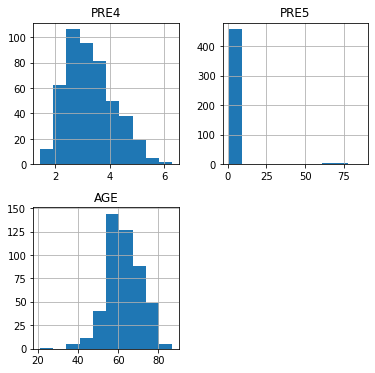

In [149]:
# Visualizing the distributions of the continuous variables

fig = plt.figure(figsize = (6, 6))
ax = fig.gca()
df[['PRE4','PRE5','AGE']].hist(ax = ax);

From the distributions above, it appears there are outliers in both the PRE5 and AGE features

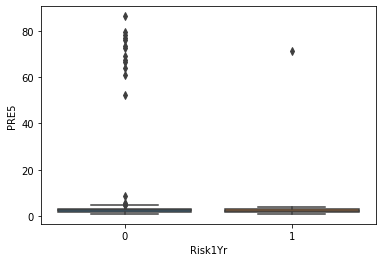

In [150]:
# Plotting PRE5 distribution of the majority and minority class -- outliers shown

ax = sns.boxplot(x="Risk1Yr", y="PRE5", data=df, showfliers=True)

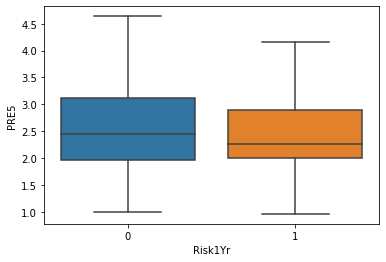

In [151]:
# Plotting PRE5 distribution of the majority and minority class -- outliers removed

ax = sns.boxplot(x="Risk1Yr", y="PRE5", data=df, showfliers=False)

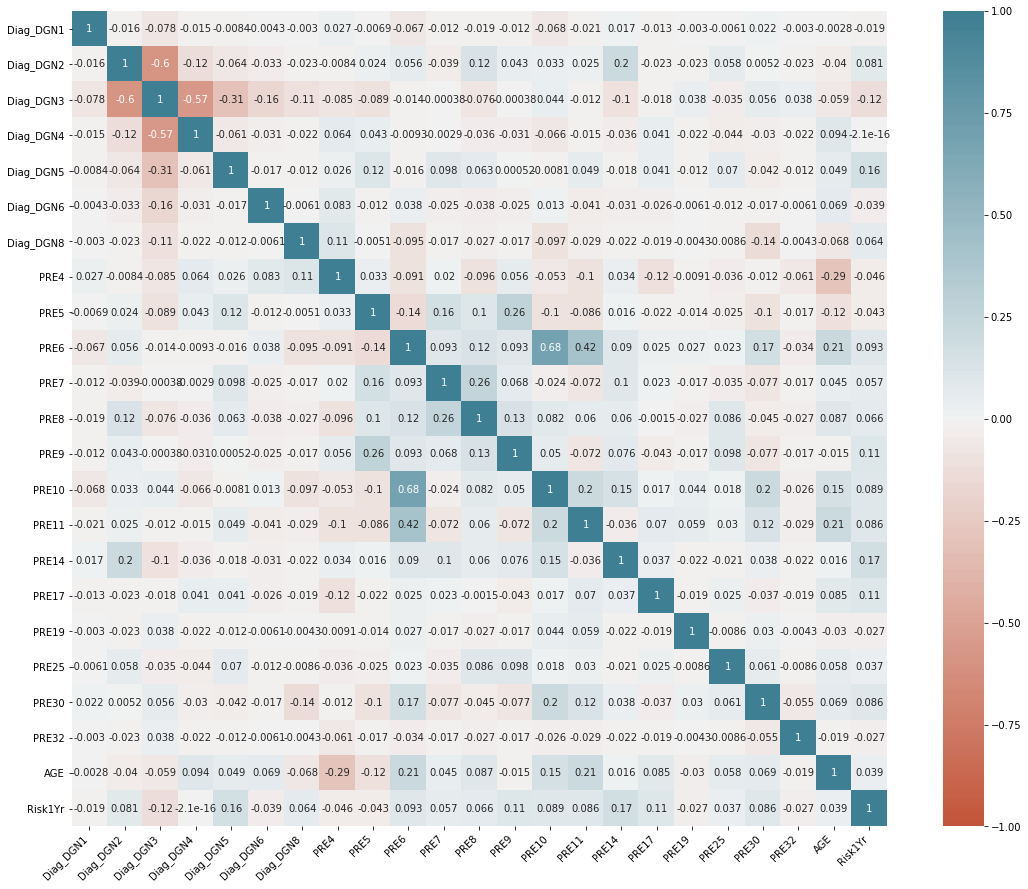

In [152]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Multiple Correspondence Analysis for Categorical Data

In [53]:
cat_data = df.drop(columns=['Risk1Yr','AGE','PRE4','PRE5','PRE6','PRE14','Diag_DGN3'])
cat_data.columns

Index(['Diag_DGN1', 'Diag_DGN2', 'Diag_DGN4', 'Diag_DGN5', 'Diag_DGN6',
       'Diag_DGN8', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19',
       'PRE25', 'PRE30', 'PRE32'],
      dtype='object')

In [54]:
# Checking the categorical data's shape

cat_data.shape

(470, 16)

In [55]:
# Verifying all features are binary

cat_data.nunique()

Diag_DGN1    2
Diag_DGN2    2
Diag_DGN4    2
Diag_DGN5    2
Diag_DGN6    2
Diag_DGN8    2
PRE7         2
PRE8         2
PRE9         2
PRE10        2
PRE11        2
PRE17        2
PRE19        2
PRE25        2
PRE30        2
PRE32        2
dtype: int64

In [56]:
X_new = pd.get_dummies(df, columns=['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
       'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32'])
X_new = X_new.drop(columns=['Diag_DGN3','PRE4','PRE5','PRE6','PRE14','AGE','Risk1Yr'])
X_new.head()

,Diag_DGN1,Diag_DGN2,Diag_DGN4,Diag_DGN5,Diag_DGN6,Diag_DGN8,PRE7_0,PRE7_1,PRE8_0,PRE8_1,...,PRE17_0,PRE17_1,PRE19_0,PRE19_1,PRE25_0,PRE25_1,PRE30_0,PRE30_1,PRE32_0,PRE32_1
0,0,1,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,1,1,0
1,0,0,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,1,1,0
2,0,0,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,1,1,0
3,0,0,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,1,0,1,0,1,0,0,1,1,0


In [57]:
from prince import MCA

In [58]:
# Running MCA

mca = MCA(n_components = 2, n_iter = 3, copy=True, check_input=True, random_state = 51)
mca.fit(X_new)
mca.transform(X_new)

,0,1
0,-0.572451,-0.133996
1,0.284205,-0.239577
2,-0.103116,-0.182119
3,0.677268,-0.076701
4,-0.642598,0.350222
...,...,...
465,-0.185288,-0.096578
466,0.284205,-0.239577
467,0.289947,-0.019244
468,-0.528994,-0.223279


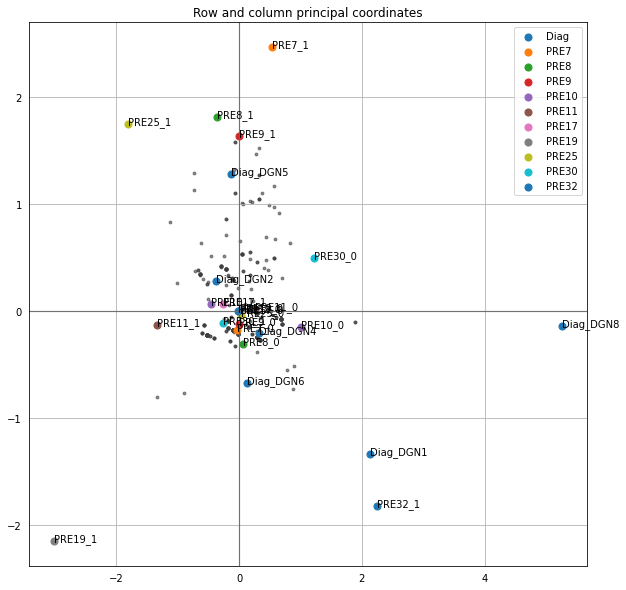

In [61]:
# Plotting components

try:

    ax = mca.plot_coordinates(
         X=X_new,
         ax=None,
         figsize=(10, 10),
         show_row_points=True,
         row_points_size=8,
         show_row_labels=False,
         show_column_points=True,
         column_points_size=50,
         show_column_labels=True,
         legend_n_cols=1
 )

except: 
    
    ZeroDivisionError

# Weighted Logistic Regression

Creating a baseline model using weighted logistic regression that will better handle the imbalanced classes in the dataset.

In [62]:
# Import model and metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [63]:
# Split the dataset into X and y

X = df.drop(['Risk1Yr'] ,axis=1)
y = df['Risk1Yr']

In [64]:
# Train Test Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Checking shape of the train and testing sets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(376, 22)
(376,)
(94, 22)
(94,)


In [66]:
# Scale on the training set and apply transform to the test set

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We will first start by using the default Logistic Regression Model with no added weights and all features to establish a baseline.

In [67]:
# Define our model

lg1 = LogisticRegression(random_state=42, class_weight=None)

# Fit it

lg1.fit(X_train_scaled,y_train)

# Test

y_pred = lg1.predict(X_test_scaled)

In [68]:
# model performance

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.776595744680851
Confusion Matrix: 
[[72  3]
 [18  1]]
Area Under Curve: 0.5063157894736842
Recall score: 0.05263157894736842


The confusion matrix tells us that our model predicted on 94 observations contained within the test set. 
Of these, it predicted 90 'survived post-surgery' and predicted 4 'did not survive'
In actuality, 75 'survived post-surgery' and 19 'did not survive'

Since we're wanting to limit the number of False Negatives, we will look to optimize our model's Recall Score

In [69]:
# As a first step, we will try a weighted model w/ weights that reflect
# the imbalance in our dataset (85/15 split in majority/minority classes)
# define class weights
w = {0:15, 1:85}

# define model
lg2 = LogisticRegression(random_state=42, class_weight=w)

# fit it
lg2.fit(X_train_scaled,y_train)

# test
y_pred = lg2.predict(X_test_scaled)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.6170212765957447
Confusion Matrix: 
[[51 24]
 [12  7]]
Area Under Curve: 0.5242105263157895
Recall score: 0.3684210526315789


From this initial weighting we can see that accuracy decreased, however, recall dramatically improved over the baseline model. 

Of the 19 instances included in our test set where the patient did not survive post surgery, our model improved by correctly identifying an additional 6. 

We'll next try GridSearch to cycle through various weights to determine an optimal weighting for our logistic regression model

In [72]:
# define weight hyperparameter

w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
     
hyperparam_grid = {"class_weight": w }

In [73]:
# define model

lg3 = LogisticRegression(random_state=42, class_weight=w)

In [74]:
# define evaluation procedure

grid = GridSearchCV(lg3, hyperparam_grid, scoring="recall", cv=10, n_jobs=-1, refit=True)
grid.fit(X_train_scaled,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 1.0 with param: {'class_weight': {0: 0.01, 1: 1.0}}


In [75]:
# We will now use the weights from the grid search to see how it effects model performance

w = {0:0.01, 1:1.0}

# define model
lg3 = LogisticRegression(random_state=42, class_weight=w)

# fit it
lg3.fit(X_train_scaled,y_train)

# test
y_pred = lg3.predict(X_test_scaled)

# define evaluation procedure

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model

scores = cross_val_score(lg3, X, y, scoring='recall', cv=cv, n_jobs=-1)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.22340425531914893
Confusion Matrix: 
[[ 2 73]
 [ 0 19]]
Area Under Curve: 0.5133333333333333
Recall score: 1.0


# Testing Decision Tree Model

Because decision tree models split on a single yes/no decision node, it is not necessary to normalize the dataset prior to fitting to the model. For this reason they are popular choices

In [76]:
# Start by creating X and y using all features 

X = df.drop(['Risk1Yr'] ,axis=1)
y = df['Risk1Yr']

In [77]:
# Split the data into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Check shape to make sure data was split properly

print( X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(376, 22) (376,)
(94, 22) (94,)


In [79]:
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus

# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'

gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state=42)

# Call fit() on the gini_model as you did with the entr_model

gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 

y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before

pd.Series(y_pred)

# Check out gini_model

gini_model

DecisionTreeClassifier(random_state=42)

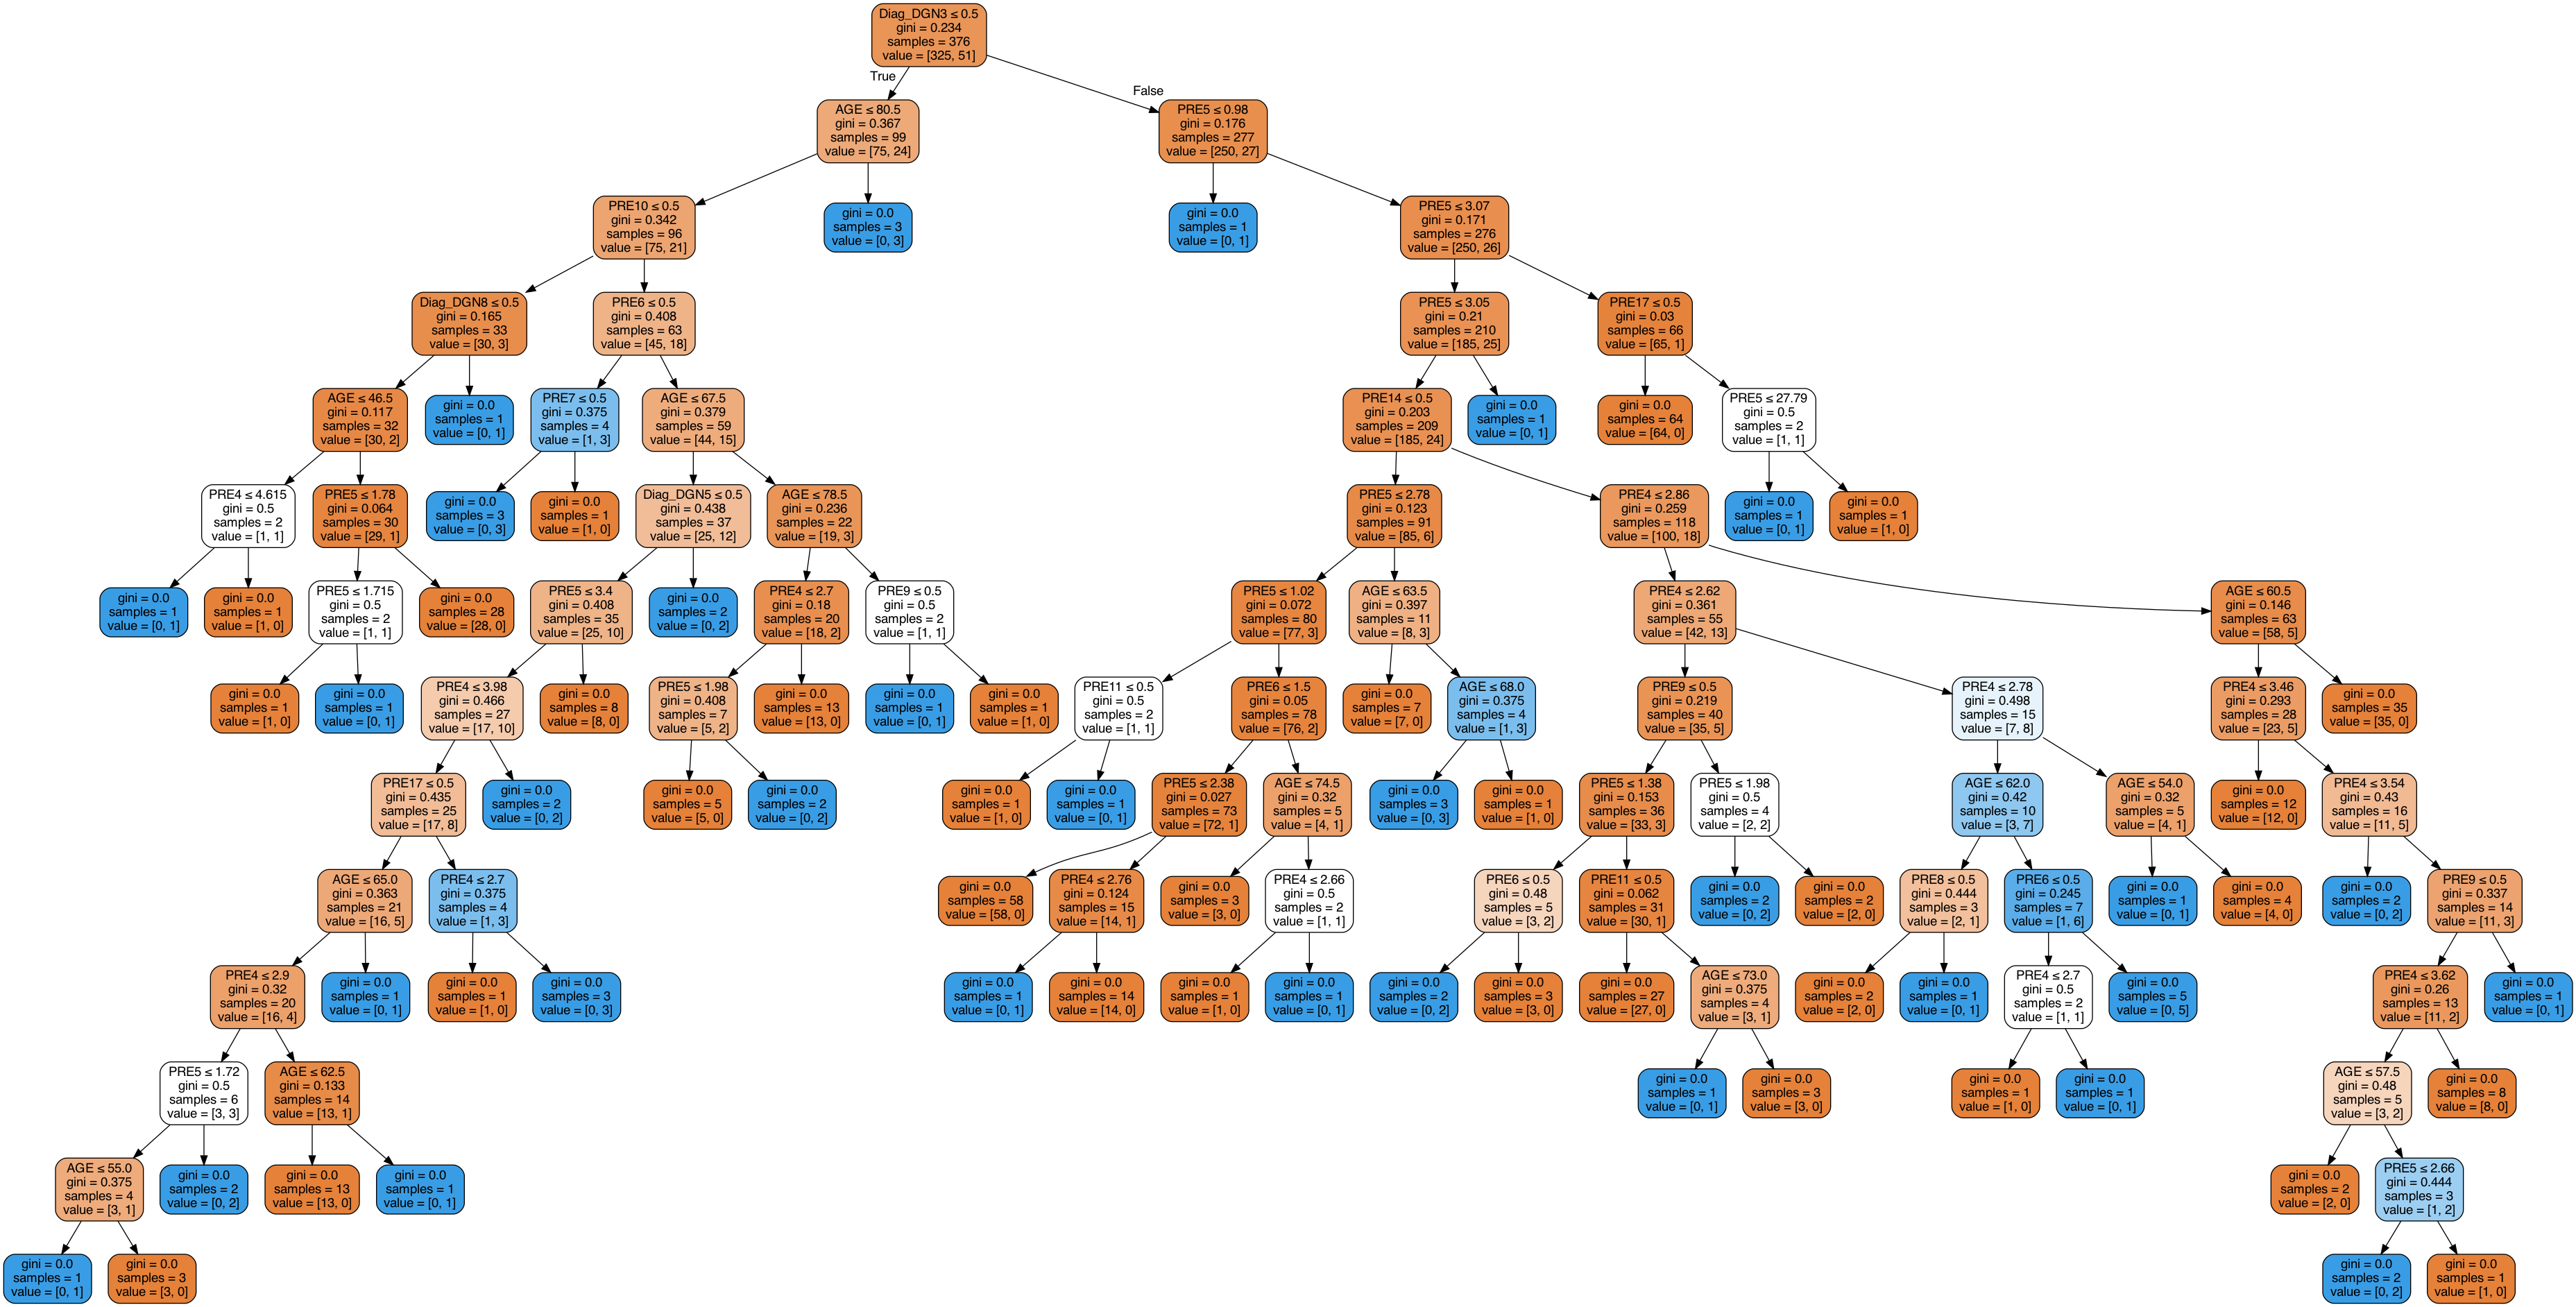

In [80]:

dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns)

# Alternatively for class_names use gini_model.classes_

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [81]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label=1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label=1))

Model Gini impurity model
Accuracy: 0.6808510638297872
Balanced accuracy: 0.46596491228070175
Precision score 0.13333333333333333
Recall score 0.10526315789473684


Using all features and no max_depth led to an overly complicated tree, with very low recall and mediocre accuracy

In [153]:
X = df.drop(['Risk1Yr','Diag_DGN3','PRE6'], axis=1)
y = df['Risk1Yr']

# Split the data into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gini Model w/ Max Depth = 5

gini_model2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Do the fit, predict, and series transformations as before. 

gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
pd.Series(y_pred)
gini_model2

DecisionTreeClassifier(max_depth=5, random_state=42)

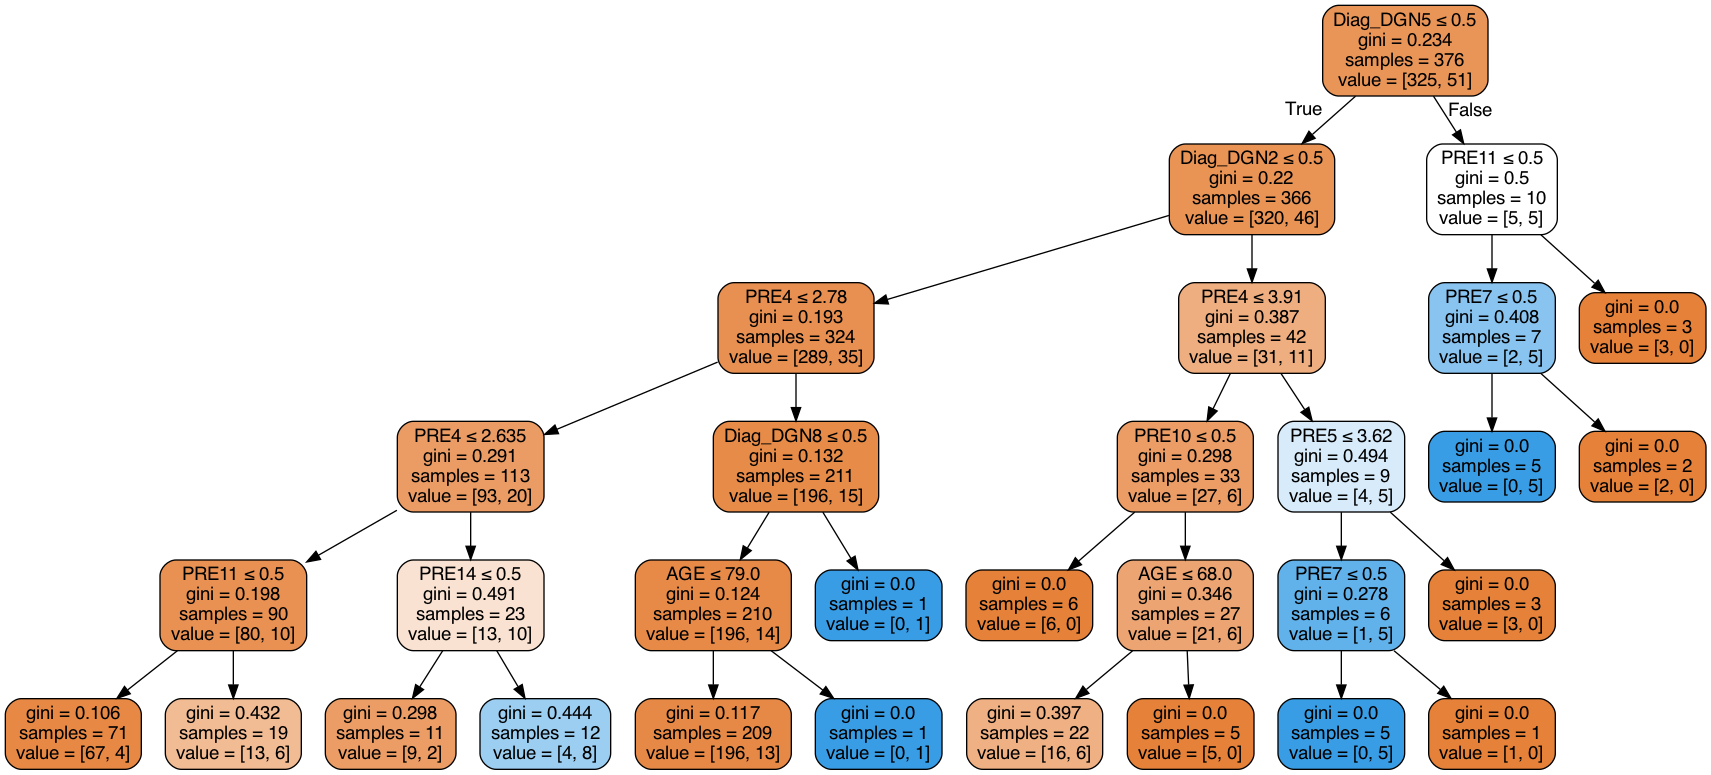

In [154]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns)

# Alternatively for class_names use gini_model2.classes_

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [106]:
print("Gini impurity  model - max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 1))

Gini impurity  model - max depth 5
Accuracy: 0.7553191489361702
Balanced accuracy: 0.5126315789473684
Precision score 0.25
Recall score 0.10526315789473684


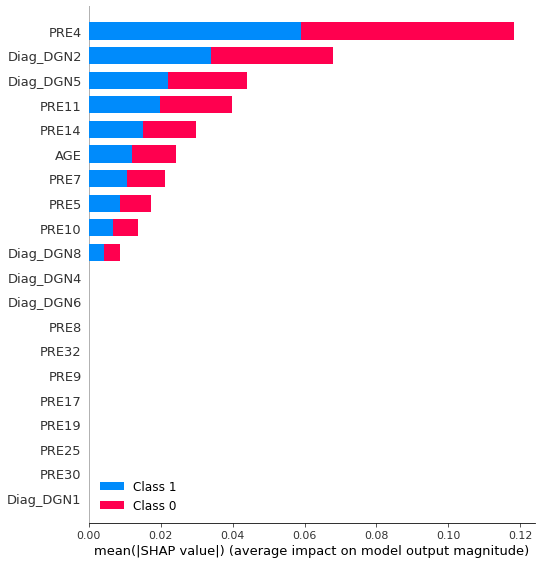

In [107]:
import shap

shap_values = shap.TreeExplainer(gini_model2).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [165]:
# Get the predictions and put them with the test data.

X_output = X_test.copy()
X_output.loc[:,'Risk1Yr'] = np.round(gini_model2.predict(X_output),2)

# Randomly pick some observations

random_picks = np.arange(1,94,5) 
S = X_output.iloc[random_picks]
S

,Diag_DGN1,Diag_DGN2,Diag_DGN4,Diag_DGN5,Diag_DGN6,Diag_DGN8,PRE4,PRE5,PRE7,PRE8,...,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
73,0,0,1,0,0,0,6.30,5.48,0,0,...,0,0,0.0,0,0,0,0,0,45.0,0
210,0,0,0,0,0,0,4.72,4.56,0,0,...,0,0,0.0,0,0,0,1,0,51.0,0
442,0,1,0,0,0,0,4.08,2.24,0,0,...,1,0,1.0,0,0,0,0,0,61.0,1
157,0,0,0,0,0,0,2.76,1.60,0,0,...,1,1,1.0,0,1,0,1,0,60.0,1
465,0,1,0,0,0,0,3.88,2.12,0,0,...,1,0,2.0,0,0,0,1,0,63.0,0
440,0,0,0,0,0,0,3.00,2.44,0,0,...,1,1,1.0,0,0,0,1,0,65.0,0
238,0,0,0,1,0,0,3.40,2.08,0,0,...,0,1,0.0,0,0,0,1,0,55.0,0
386,0,0,0,0,0,0,4.40,3.56,0,0,...,1,1,0.0,0,0,0,1,0,60.0,0
248,0,0,1,0,0,0,4.56,3.68,0,0,...,1,0,1.0,0,0,0,1,0,62.0,0
297,0,0,0,0,0,0,4.36,3.24,1,0,...,1,0,1.0,0,0,0,1,0,54.0,0


In [174]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(gini_model2)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value[j], shap_values_Model[j], S.iloc[[j]])
    return(p)

In [175]:
shap_plot(0)

IndexError: index 1 is out of bounds for axis 0 with size 1

# Random Forrest Classifier

In [96]:
# Define X , y

X = df.drop(columns = 'Risk1Yr')
y = df.Risk1Yr

# Summarize class distribution

from collections import Counter

counter = Counter(y)
print(counter)

Counter({0: 400, 1: 70})


In [97]:
# Importing imbalanced learner for oversampling

import imblearn
print(imblearn.__version__)

0.7.0


In [98]:
# Oversample imbalanced dataset with SMOTE

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transform the dataset

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution

counter = Counter(y)
print(counter)

Counter({0: 400, 1: 400})


In [99]:
# Split the data into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(max_depth=5, random_state=42)

# Model and fit

RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)

print("Random Forest Model - max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 1))

Random Forest Model - max depth 5
Accuracy: 0.8
Balanced accuracy: 0.7969924812030075
Precision score 0.782608695652174
Recall score 0.8571428571428571


In [101]:
# Checking the Actual and Predicted values to verify that no positive labels were predicted

print(np.unique(y_pred), np.unique(y_test))

[0 1] [0 1]


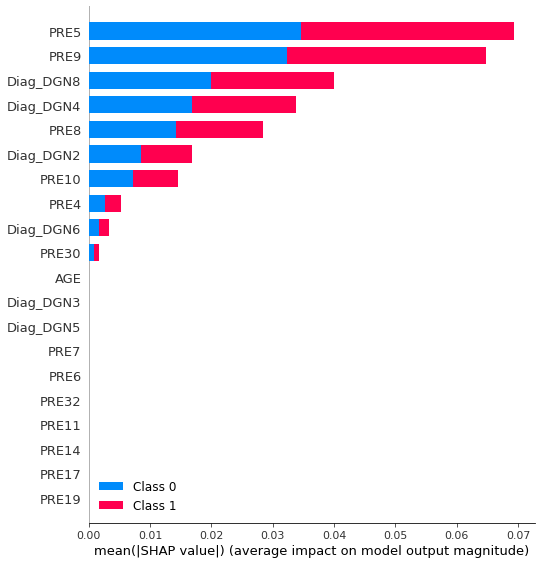

In [102]:
import shap

shap_values = shap.TreeExplainer(gini_model2).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")